<h1>Logistic Regression</h1>

Logistic regression is a well-known type of classification in linear modeling. Logistic Regression is commonly used to estimate the probability that an instance belongs to a particular class. If the estimated probability is greater than 50% then the model predicts that the instance belongs to that class (called positive class, labeled "1") and otherwise it predicts that it does not(i.e, it belongs to the negative class, labeled "0"). This makes it a binary classifier.

<h2>How does it work?</h2>

Logistic regression model computes a weighted sum of the input features (plus a bias term) but instead of outputting the result directly like a Linear model does, it outputs the logistic of this model. 

$$p hat = hθ x = σ x⊺θ$$

The logistic-noted  σ(·) is a sigmoid function (i.e., S-shaped) that outputs a number between 0 and 1.

σ(t) = 1/1+exp −t

Once the Logistic Regression model has estimated the probability p = hθ(x) that an instance x belongs to the positive class, it can make its prediction ŷ easily. In the following example, lets see if the mean radius of breast mass can help us classify it as either malignant or benign.

In [251]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


breast_cancer = datasets.load_breast_cancer()

X = breast_cancer["data"][:, 0] # mean_radius
y = (breast_cancer["target"] == 0).astype(np.int) # 0 if malignant, else 1, benign
G = X.reshape(-1,1)

The target is 0 if it is malignant or 1 if it is benign.

In [252]:
log_reg = LogisticRegression()
log_reg.fit(G, y)

LogisticRegression()

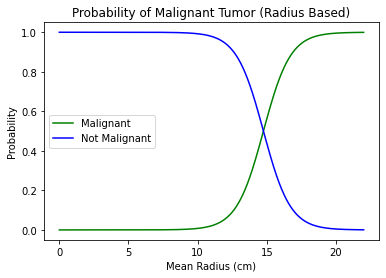

In [253]:
X_new = np.linspace(0, 22, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Malignant") 
plt.plot(X_new, y_proba[:, 0], "b-", label="Not Malignant")
plt.title('Probability of Malignant Tumor (Radius Based)')
plt.xlabel('Mean Radius (cm)')
plt.ylabel('Probability')
plt.legend()

The mean radius ranges from 0 to 20 cm. Above the 15 cm raidus the classifier is highly confident the breast mass is malignant cancer while below 15 cm it is highly confident that is not malignant.

In [254]:
log_reg.predict([[15.3], [18]])

array([1, 1])

As we can see 15.3 (representing the mean raidus of the breast mass) will be assigned a value of 1 representing a high likelihood the breast mass is malignant while a value of 0 represents a low likelihood the breast mass is benign.